In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Activation,Dropout,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
!pip install tensorflow

     ------------------------------------ 266.3/266.3 MB 557.4 kB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 1.0 MB/s eta 0:00:00
     -------------------------------------- 895.7/895.7 KB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 630.5 kB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 KB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 916.2 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 1.0 MB/s eta 0:00:00
     ------------------------------------ 126.5/126.5 KB 465.2 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 KB 272.1 kB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 17

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Activation,Dropout,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [7]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(directory='C:/Users/HP/OneDrive/Desktop/seg_train',target_size=(50,50),shuffle=True)
test_dataset = test.flow_from_directory(directory='C:/Users/HP/OneDrive/Desktop/seg_test',target_size=(50,50),shuffle=True)

Found 14034 images belonging to 1 classes.
Found 3000 images belonging to 1 classes.


[6, 25, 16, 11, 21, 26, 27, 2, 14, 5]


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


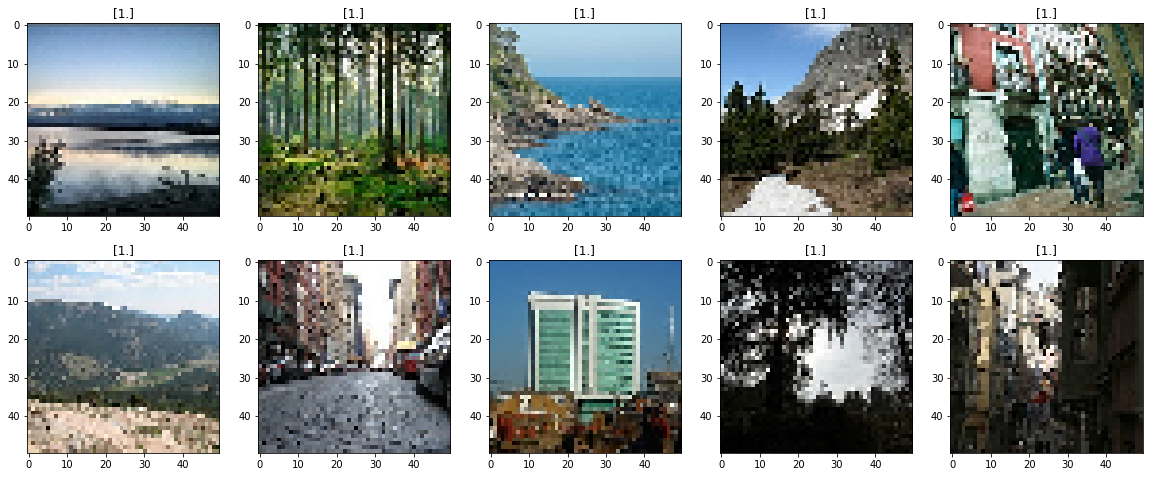

In [8]:
indices = [np.random.randint(32) for i in range(10)]
print(indices)

plt.figure(figsize=(20,8))
for i in enumerate(indices):
    plt.subplot(2,5,i[0]+1)
    plt.imshow(train_dataset[0][0][i[1]])
    plt.title(train_dataset[0][1][i[1]])
plt.show()

In [9]:
values = list(train_dataset.class_indices.values())
keys = list(train_dataset.class_indices.keys())

dics = list(map(lambda x,y:{x:y},values,keys))

from functools import reduce
mappings = reduce(lambda x,y:{**x,**y},dics)
mappings

{0: 'seg_train'}

In [10]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=50,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=50,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=75,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=75,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
kernel_regularizer = keras.regularizers.l1_l2(l1=1e-5,l2=1e-4)
model.add(Dense(units=50,activation='relu',kernel_regularizer=kernel_regularizer))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 activation (Activation)     (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

In [11]:
model.compile(loss='CategoricalCrossentropy',optimizer = 'adam',metrics='accuracy')
history = model.fit(train_dataset,batch_size=80,epochs=10,validation_data=test_dataset)

Epoch 1/10
439/439 [==============================] - 257s 579ms/step - loss: 6719769217001848832.0000 - accuracy: 0.0055 - val_loss: 20126690088811757568.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
439/439 [==============================] - 99s 225ms/step - loss: nan - accuracy: 0.9863 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/10
439/439 [==============================] - 102s 231ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/10
439/439 [==============================] - 98s 224ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/10
439/439 [==============================] - 98s 224ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/10
439/439 [==============================] - 100s 229ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/10
439/439 [==============================] - 102s 233ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan

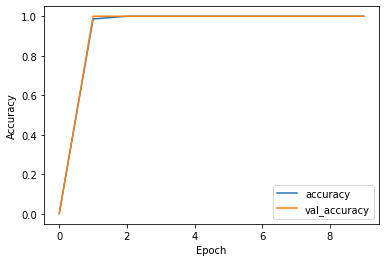

In [12]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

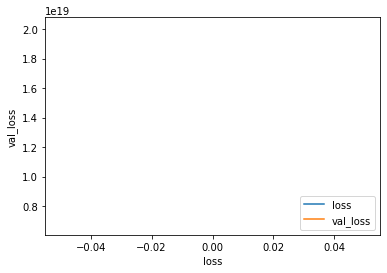

In [14]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend(loc='lower right')